In [1]:
from keras.models import load_model
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as K
K.clear_session()
config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
sess = tf.Session(config=config)
K.set_session(sess)

Using TensorFlow backend.


In [2]:
#モデルの読み込み
#①のようにmetricsに自作の関数を使う場合custom_objectsパラメータを指定しないと読み込めない
model_file_name='../model_.05-0.04.hdf5'
model=load_model(model_file_name)
#model_test = load_model('/home/tsato/work/machine_learning/CNN/1orbit/2-3keV_5000/model_.09-0.07.hdf5', custom_objects={'roc_auc':roc_auc})

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [3]:
import os
flare_dir='/home/tsato/work/machine_learning/CNN/images/1orbit/3-10keV_5000/test/flare'
flare_images = os.listdir(flare_dir)

In [4]:
#評価
from keras.preprocessing.image import img_to_array, load_img
import pandas as pd

df = []
for jpeg_name in flare_images:
    img_path = (jpeg_name)
    img = img_to_array(load_img(flare_dir + '/' + img_path, target_size=(32,32)).convert('L'))
    img_nad = img_to_array(img)/255    #0-1に変換
    img_nad = img_nad[None, ...]    #四次元配列に
    label=['0','1']
    pred = model.predict(img_nad, batch_size=1, verbose=0)
    pred_label = label[np.argmax(pred[0])]
    #score = pd.DataFrame(pred)
    score = np.max(pred)
    a=jpeg_name.split("_")
    list=[int(a[0]),jpeg_name,1,pred[0][0],pred[0][1],pred_label]
    df.append(list)
result = pd.DataFrame(df)
result = result.sort_values([0])
result = result.reset_index(drop=True)
result = result.iloc[:,1:6]
flare_result=result

In [5]:
import os
bgd_dir='/home/tsato/work/machine_learning/CNN/images/1orbit/3-10keV_5000/test/background/'
bgd_images = os.listdir(bgd_dir)

In [6]:
#評価
from keras.preprocessing.image import img_to_array, load_img
import pandas as pd

df = []
for jpeg_name in bgd_images:
    img_path = (jpeg_name)
    img = img_to_array(load_img(bgd_dir + '/' + img_path, target_size=(32,32)).convert('L'))
    img_nad = img_to_array(img)/255    #0-1に変換
    img_nad = img_nad[None, ...]    #四次元配列に
    label=['0','1']
    pred = model.predict(img_nad, batch_size=1, verbose=0)
    pred_label = label[np.argmax(pred[0])]
    #score = pd.DataFrame(pred)
    score = np.max(pred)
    a=jpeg_name.split("_")
    #list=[int(a[0]),jpeg_name,pred_label,score]  
    list=[int(a[0]),jpeg_name,0,pred[0][0],pred[0][1],pred_label]
    df.append(list)
result = pd.DataFrame(df)
result = result.sort_values([0])
result = result.reset_index(drop=True)
result = result.iloc[:,1:6]
bgd_result=result

In [7]:
bgd_result

,1,2,3,4,5
0,278_57774.944468-57774.947350.jpg,0,0.765755,2.342453e-01,0
1,278_58138.309861-58138.312743.jpg,0,0.999958,4.194524e-05,0
2,278_57411.358542-57411.361331.jpg,0,0.999024,9.758449e-04,0
3,279_57775.008843-57775.011586.jpg,0,0.999987,1.259214e-05,0
4,279_57411.422801-57411.425613.jpg,0,0.999309,6.914067e-04,0
5,279_58138.374213-58138.377095.jpg,0,0.185018,8.149818e-01,1
6,280_58138.438542-58138.441377.jpg,0,0.999907,9.294965e-05,0
7,280_57411.487245-57411.489942.jpg,0,0.999967,3.332740e-05,0
8,280_57775.073148-57775.075451.jpg,0,1.000000,7.598983e-09,0
9,281_57411.551435-57411.554225.jpg,0,0.999923,7.660217e-05,0


In [8]:
flare_result

,1,2,3,4,5
0,500_58390.670116-58390.673507.jpg,1,3.048486e-01,0.695151,1
1,500_57931.835903-57931.838877.jpg,1,2.841690e-08,1.000000,1
2,500_55121.195394-55121.198067.jpg,1,1.332850e-06,0.999999,1
3,500_56505.259352-56505.262234.jpg,1,1.106565e-06,0.999999,1
4,500_55281.198009-55281.200822.jpg,1,1.067719e-12,1.000000,1
5,500_55763.720741-55763.723692.jpg,1,3.544743e-06,0.999996,1
6,500_57217.576204-57217.579155.jpg,1,8.437712e-06,0.999992,1
7,500_56128.526134-56128.529155.jpg,1,7.806242e-08,1.000000,1
8,500_56855.449792-56855.452720.jpg,1,8.481937e-05,0.999915,1
9,500_57506.709769-57506.712720.jpg,1,1.750767e-05,0.999982,1


In [9]:
#0=bgd,1=flare
b_true = bgd_result[2].to_numpy()
f_true = flare_result[2].to_numpy()
true=np.hstack((b_true, f_true))

In [10]:
b_score = bgd_result[4].to_numpy()
f_score = flare_result[4].to_numpy()
score=np.hstack((b_score, f_score))

In [11]:
from sklearn.metrics import roc_curve
roc = roc_curve(true, score)
fpr, tpr, thresholds = roc_curve(true, score)

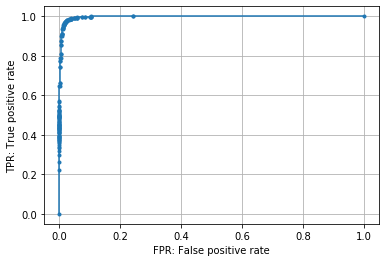

In [12]:
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
#plt.savefig('data/dst/sklearn_roc_curve.png')

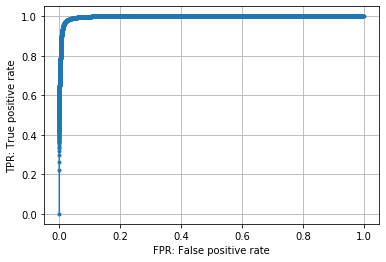

In [15]:
fpr_all, tpr_all, thresholds_all = roc_curve(true, score,
                                             drop_intermediate=False)
plt.plot(fpr_all, tpr_all, marker='.')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.savefig('roc_3_10keV.png')

In [14]:
#AUC
from sklearn import metrics
auc = metrics.roc_auc_score(true, score)
print(auc)

#fpr, tpr, thresholds = metrics.roc_curve(list_label, list_score)
auc = metrics.auc(fpr_all, tpr_all)
print(auc)

0.9967630000000001
0.9967630000000001


In [15]:
#recall
from sklearn.metrics import recall_score
print(recall_score(true, score >= 0.5))

0.98


In [16]:
#precision
from sklearn.metrics import precision_score
print(precision_score(true, score >=0.5))

0.9751243781094527


In [17]:
#f-score
from sklearn.metrics import f1_score
print(f1_score(true,score >=0.5))

0.9775561097256857
